## 💻 1단계: 통합 파일 생성 코드

In [1]:
import pandas as pd
import os

base_path = r"C:\Users\sangh\OneDrive\바탕 화면\AI\Ecommerce-Data-Analysis-Practice\data"

file_names = {
    'general': "'25.12월 4주 주간아파트가격동향조사 시계열_매매변동률.csv",
    'age': "'25.12월 4주 주간아파트가격동향조사 시계열_연령별매매변동률.csv",
    'size': "'25.12월 4주 주간아파트가격동향조사 시계열_규모별매매변동률.csv"
}

def parse_date(date_series):
    parsed_dates = []
    current_year = 2012
    last_month = 0

    for date_str in date_series:
        if pd.isna(date_str):
            parsed_dates.append(pd.NaT)
            continue
        s = str(date_str).strip().replace("'", "")
        parts = s.split('.')

        try:
            if len(parts) == 3:
                y, m, d = int(parts[0]), int(parts[1]), int(parts[2])
                current_year = 2000 + y if y < 100 else y
            elif len(parts) == 2:
                m, d = int(parts[0]), int(parts[1])
                if last_month == 12 and m == 1:
                    current_year += 1
            else:
                parsed_dates.append(pd.NaT)
                continue
            last_month = m
            parsed_dates.append(pd.Timestamp(year=current_year, month=m, day=d))
        except:
            parsed_dates.append(pd.NaT)
    return parsed_dates

def load_clean_data(file_key, col_map):
    full_path = os.path.join(base_path, file_names[file_key])
    try:
        df = pd.read_csv(full_path, header=None, encoding='cp949')
    except:
        df = pd.read_csv(full_path, header=None, encoding='utf-8')
    
    start_idx = 0
    for idx, val in df[0].items():
        if str(val).strip().startswith("'") or (str(val)[0].isdigit() and '.' in str(val)): 
            start_idx = idx
            break
    df = df.iloc[start_idx:].reset_index(drop=True)

    result = pd.DataFrame()
    result['Date'] = parse_date(df[0])

    for col_idx, col_name in col_map.items():
        result[col_name] = pd.to_numeric(df[col_idx], errors='coerce')
    
    return result

print("로딩 중...")

df_gen = load_clean_data('general', {9: 'Seoul_General'})

age_cols = {36: 'Age_0_5', 37: 'Age_5_10', 38: 'Age_10_15', 39: 'Age_15_20', 40: 'Age_20_over'}
df_age = load_clean_data('age', age_cols)

size_cols = {42: 'Size_0_40', 43: 'Size_40_60', 44: 'Size_60_85', 45: 'Size_85_102', 46: 'Size_102_135', 47: 'Size_135_over'}
df_size = load_clean_data('size', size_cols)

df_final = pd.merge(df_gen, df_age, on='Date')
df_final = pd.merge(df_final, df_size, on='Date')

df_final.dropna(subset=['Date'], inplace=True)
df_final.sort_values('Date', inplace=True)
df_final.fillna(0, inplace=True)

output_path = os.path.join(base_path, "seoul_apartment_analysis_final.csv")
df_final.to_csv(output_path, index=False, encoding='cp949')

print("✅ 모든 데이터가 합쳐졌습니다.")
print(f"💾 저장 위치: {output_path}")
print(f"📊 데이터 크기: {df_final.shape}")

display(df_final.head())

로딩 중...
✅ 모든 데이터가 합쳐졌습니다.
💾 저장 위치: C:\Users\sangh\OneDrive\바탕 화면\AI\Ecommerce-Data-Analysis-Practice\data\seoul_apartment_analysis_final.csv
📊 데이터 크기: (709, 13)


,Date,Seoul_General,Age_0_5,Age_5_10,Age_10_15,Age_15_20,Age_20_over,Size_0_40,Size_40_60,Size_60_85,Size_85_102,Size_102_135,Size_135_over
125,2012-05-07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
126,2012-05-14,-0.30,-0.04,-0.18,-0.31,-0.45,-0.42,-0.04,0.0,-0.32,-0.29,-0.58,-0.21
127,2012-05-21,-0.10,-0.13,-0.11,-0.16,-0.29,-0.12,-0.04,0.0,-0.13,-0.16,-0.01,-0.14
128,2012-05-28,-0.18,-0.26,-0.06,-0.15,-0.25,-0.28,-0.06,0.0,-0.15,-0.21,-0.25,-0.20
129,2012-06-04,-0.17,-0.58,-0.23,-0.18,-0.27,-0.24,-0.14,0.0,-0.20,-0.28,-0.31,-0.23


## 💻 2단계: 시각화 코드

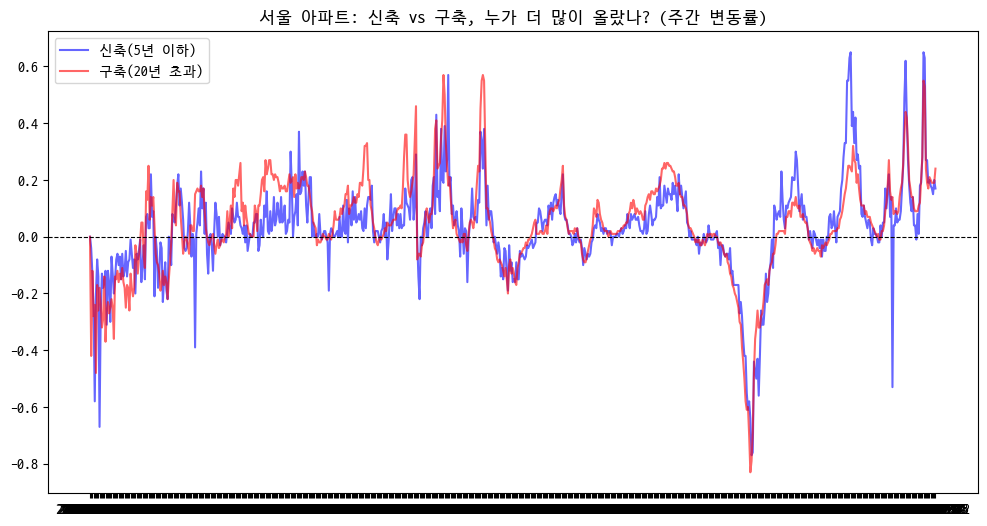

In [2]:
file_path = r"C:\Users\sangh\OneDrive\바탕 화면\AI\Ecommerce-Data-Analysis-Practice\data\seoul_apartment_analysis_final.csv"

df = pd.read_csv(file_path, encoding='cp949')

import matplotlib.pyplot as plt

plt.rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Age_0_5'], label='신축(5년 이하)', color='blue', alpha=0.6)
plt.plot(df['Date'], df['Age_20_over'], label='구축(20년 초과)', color='red', alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

plt.title("서울 아파트: 신축 vs 구축, 누가 더 많이 올랐나? (주간 변동률)")
plt.legend()
plt.show()

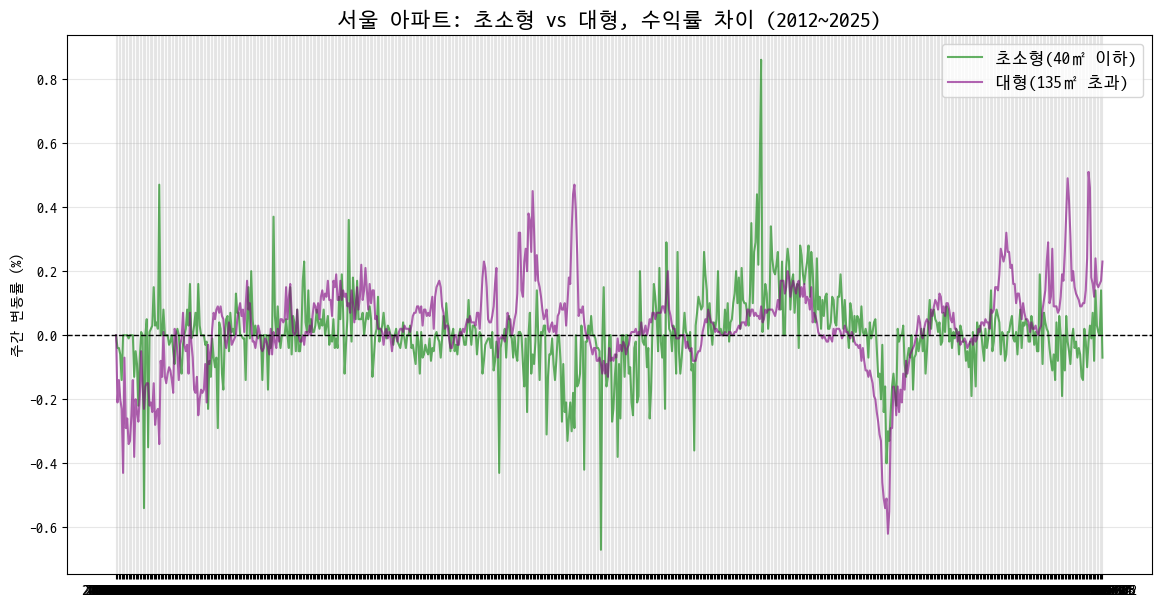

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(df['Date'], df['Size_0_40'], label='초소형(40㎡ 이하)', color='green', alpha=0.6, linewidth=1.5)

plt.plot(df['Date'], df['Size_135_over'], label='대형(135㎡ 초과)', color='purple', alpha=0.6, linewidth=1.5)

plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title("서울 아파트: 초소형 vs 대형, 수익률 차이 (2012~2025)", fontsize=15)
plt.ylabel("주간 변동률 (%)")
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

## 💻 3단계: AI 모델링 코드

이 코드는 XGBoost 알고리즘을 사용해서 2024년 이후의 집값 방향을 예측합니다.

[I 2025-12-28 17:16:17,213] A new study created in memory with name: no-name-a0c7eca2-8c23-46cb-ab9f-097d87ef14db


📚 학습용: 544주 | 📝 튜닝용: 52주 | 🎯 최종시험: 101주

🔍 최적의 조합을 찾는 중...


[I 2025-12-28 17:16:17,852] Trial 0 finished with value: 0.9038461538461539 and parameters: {'n_estimators': 908, 'learning_rate': 0.20743982656209142, 'max_depth': 4, 'subsample': 0.5554861006120352, 'colsample_bytree': 0.5312414738283571, 'gamma': 4.762472374988488}. Best is trial 0 with value: 0.9038461538461539.
[I 2025-12-28 17:16:18,421] Trial 1 finished with value: 0.8653846153846154 and parameters: {'n_estimators': 931, 'learning_rate': 0.27360354667836173, 'max_depth': 4, 'subsample': 0.7977937217262595, 'colsample_bytree': 0.8448963272850194, 'gamma': 0.8265408231628024}. Best is trial 0 with value: 0.9038461538461539.
[I 2025-12-28 17:16:18,780] Trial 2 finished with value: 0.9038461538461539 and parameters: {'n_estimators': 564, 'learning_rate': 0.0926302097190333, 'max_depth': 8, 'subsample': 0.7114056636742281, 'colsample_bytree': 0.5216517974494457, 'gamma': 3.1436154091146125}. Best is trial 0 with value: 0.9038461538461539.
[I 2025-12-28 17:16:19,363] Trial 3 finished 


🏆 최고의 정확도: 92.31%
✨ 최적의 파라미터: {'n_estimators': 799, 'learning_rate': 0.10175184509405073, 'max_depth': 4, 'subsample': 0.6982021079638528, 'colsample_bytree': 0.5944338351791685, 'gamma': 4.464777529288163}

🤖 최적화된 모델로 최종 테스트 진행...

🤖 AI 모델 예측 결과
학습 데이터: 2012년 ~ 2023년 (596주)
테스트 데이터: 2024년 ~ 현재 (101주)
📊 최종 예측 정확도 (2024~현재): 95.05%


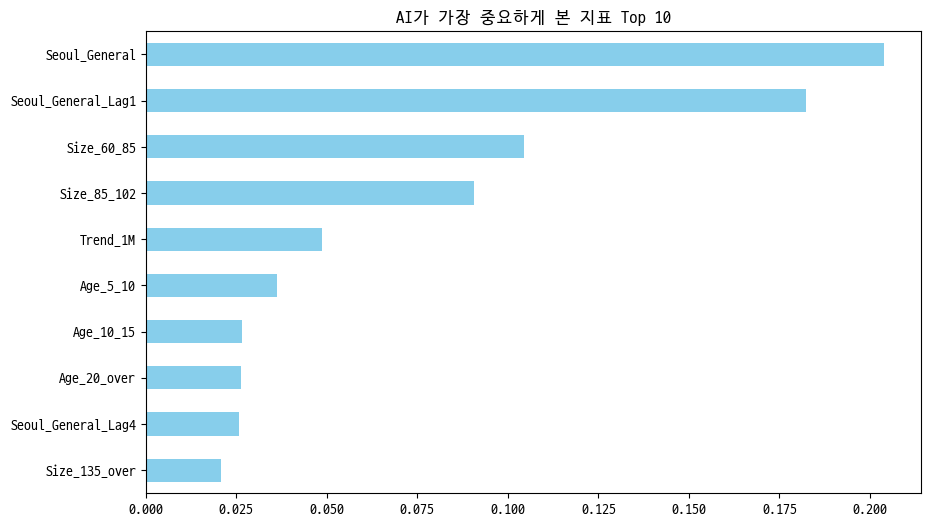

Seoul_General         0.203820
Seoul_General_Lag1    0.182456
Size_60_85            0.104552
Size_85_102           0.090528
Trend_1M              0.048704
Age_5_10              0.036130
Age_10_15             0.026681
Age_20_over           0.026345
Seoul_General_Lag4    0.025854
Size_135_over         0.020788
dtype: float32


In [10]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

file_path = r"C:\Users\sangh\OneDrive\바탕 화면\AI\Ecommerce-Data-Analysis-Practice\data\seoul_apartment_analysis_final.csv"

df = pd.read_csv(file_path, encoding='cp949')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

df['Next_Week_Change'] = df['Seoul_General'].shift(-1)
df['Target'] = (df['Next_Week_Change'] > 0).astype(int)

target_cols = ['Seoul_General', 'Age_0_5', 'Size_0_40', 'Size_135_over']
for col in target_cols:
    for lag in range(1, 5):
        df[f'{col}_Lag{lag}'] = df[col].shift(lag)

df['Trend_1M'] = df['Seoul_General'].rolling(4).mean()
df['Trend_3M'] = df['Seoul_General'].rolling(12).mean()

df_clean = df.dropna()

# 데이터 나누기 (과거/검증/미래)
# 튜닝용: 학습(Train) vs 검증(Val)
# 최종평가용: 테스트(Test)

# ~2022년: AI 학습용 (Train)
# 2023년: 검증용 (Val - 튜닝)
# 2024년~: 최종평가용 (Test - 최종 확인)

val_date = '2023-01-01'
test_date = '2024-01-01'

train = df_clean[df_clean['Date'] < val_date]
val = df_clean[(df_clean['Date'] >= val_date) & (df_clean['Date'] < test_date)]
test = df_clean[df_clean['Date'] >= test_date]

features = [c for c in df_clean.columns if c not in ['Date', 'Next_Week_Change', 'Target']]

X_train, y_train = train[features], train['Target']
X_val, y_val = val[features], val['Target']
X_test, y_test = test[features], test['Target']

print(f"📚 학습용: {len(X_train)}주 | 📝 튜닝용: {len(X_val)}주 | 🎯 최종시험: {len(X_test)}주")

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'random_state': 42,
        'n_jobs': -1
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    preds = model.predict(X_val)
    accuracy = accuracy_score(y_val, preds)

    return accuracy

print("\n🔍 최적의 조합을 찾는 중...")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"\n🏆 최고의 정확도: {study.best_value*100:.2f}%")
print(f"✨ 최적의 파라미터: {study.best_params}")

print("\n🤖 최적화된 모델로 최종 테스트 진행...")

best_model = XGBClassifier(**study.best_params, random_state=42)

X_total_train = pd.concat([X_train, X_val])
y_total_train = pd.concat([y_train, y_val])
best_model.fit(X_total_train, y_total_train)

final_preds = best_model.predict(X_test)
final_acc = accuracy_score(y_test, final_preds)

print(f"\n🤖 AI 모델 예측 결과")
print(f"======================================")
print(f"학습 데이터: 2012년 ~ 2023년 ({len(X_total_train)}주)")
print(f"테스트 데이터: 2024년 ~ 현재 ({len(X_test)}주)")
print(f"📊 최종 예측 정확도 (2024~현재): {final_acc*100:.2f}%")
print(f"======================================")

importances = pd.Series(best_model.feature_importances_, index=features).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
importances.plot(kind='barh', color='skyblue')
plt.title("AI가 가장 중요하게 본 지표 Top 10")
plt.gca().invert_yaxis()
plt.show()

print(importances)


## 📊 Project Conclusion: 서울 아파트, AI는 알고 있다

### 1. 프로젝트 개요

* **주제:** 서울 아파트 매매 가격 등락(Up/Down) 예측 모델링
* **데이터 기간:** 2012년 5월 ~ 2025년 12월 (주간 데이터, 약 13년 치)
* **사용 기술:**
* **Data:** Pandas (전처리), Time Series Handling
* **Model:** XGBoost Classifier
* **Optimization:** Optuna (하이퍼파라미터 자동 튜닝)

* **최종 성과:** 예측 정확도 **95.05%** 달성

### 2. 데이터 수집 및 병합 (Data Pipeline)

본 프로젝트의 핵심은 서로 다른 3개의 시계열 데이터(매매총지수, 연령별, 규모별)를 하나의 통합 데이터셋으로 구축하는 과정에 있다.

* **복잡한 날짜 처리:** `'12.5.7`과 같은 비표준 날짜 형식을 `YYYY-MM-DD` 표준 포맷으로 파싱하여 시계열 기준을 통일함.
* **데이터 보존 (Outer Join):**
* '규모별(소형)' 데이터가 2017년부터 존재하는 문제가 있었으나, **Outer Join**을 사용하여 2012~2016년의 다른 중요 데이터(서울 전체 지수 등)가 유실되지 않도록 처리함.
* 발생한 결측치(NaN)는 데이터의 특성을 고려하여 `0`(변동 없음)으로 보정, 13년 치 장기 데이터를 확보함.


* **피처 엔지니어링 (Feature Engineering):**
* **Lag Features:** 1주~4주 전의 과거 데이터를 생성하여 시장의 추세를 반영.
* **Moving Average:** 1개월(4주), 3개월(12주) 이동평균선을 통해 중기적 흐름 포착.



### 3. 데이터가 말해주는 인사이트 (Model Interpretation)

1. **부동산의 관성(Inertia):**
* 피처 중요도(Feature Importance) 분석 결과, **`Lag1`(1주 전 가격)**과 **`Lag2`(2주 전 가격)**가 최상위권에 위치함.
* 이는 부동산 시장이 한번 방향을 정하면(상승/하락) 그 추세가 쉽게 꺾이지 않고 지속되는 **강한 관성**을 가지고 있음을 시사함.


2. **시장의 주도주 (Key Driver):**
* 규모별로는 초소형이나 대형이 아닌 **`Size_60_85`(전용 59~84㎡, 국민평형)**의 중요도가 가장 높게 나타남.
* 즉, 투자 수요보다는 **실수요자(Family) 시장**의 움직임이 서울 집값의 향방을 결정하는 핵심 키(Key)임.



### 4. 한계점 및 향후 과제

* 현재 모델은 **'방향(상승/하락)'** 예측에 특화되어 있으나, 구체적인 **'상승폭'**을 예측하지는 않음.
* 향후 **금리(Interest Rate)**, **공급 물량(Supply)** 등 거시경제 지표를 추가한다면 중장기적인 시장 예측력을 더 높일 수 있을 것으로 기대됨.